# Построение трехмерных графиков в библиотеке Matplotlib

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


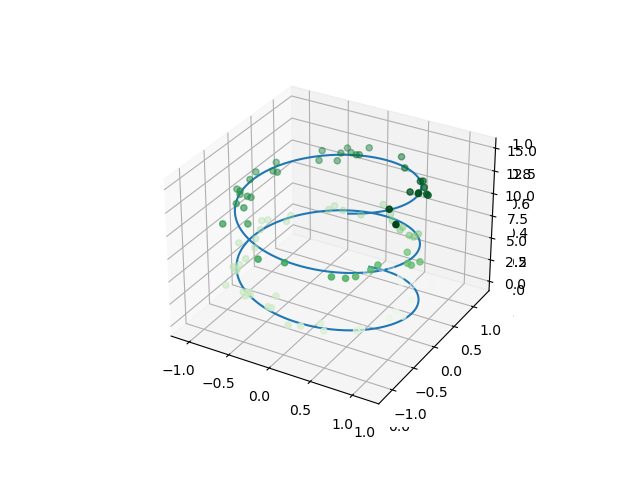

In [2]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# бага

## Трехмерные линии и точки

``ax.plot3D`` и ``ax.scatter3D``

<IPython.core.display.Javascript object>


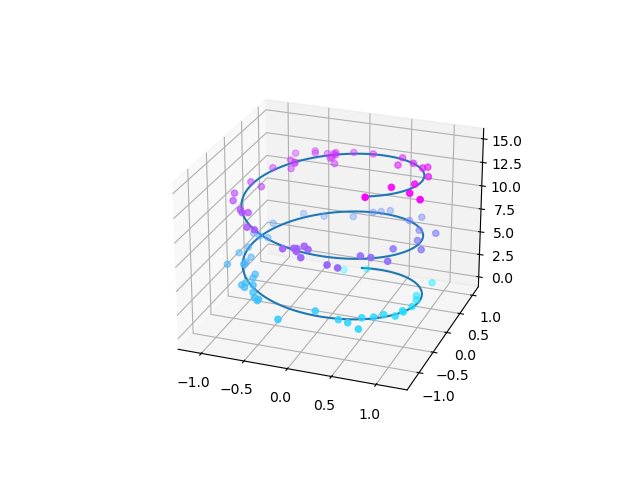

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline)

# данные для точек
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='cool')

## Трехмерные контурные графики

In [6]:
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

In [7]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

<IPython.core.display.Javascript object>


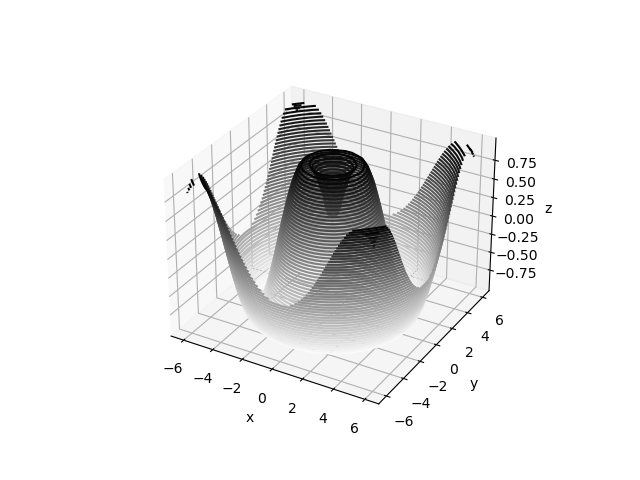

Text(0.5, 0, 'z')

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

<IPython.core.display.Javascript object>


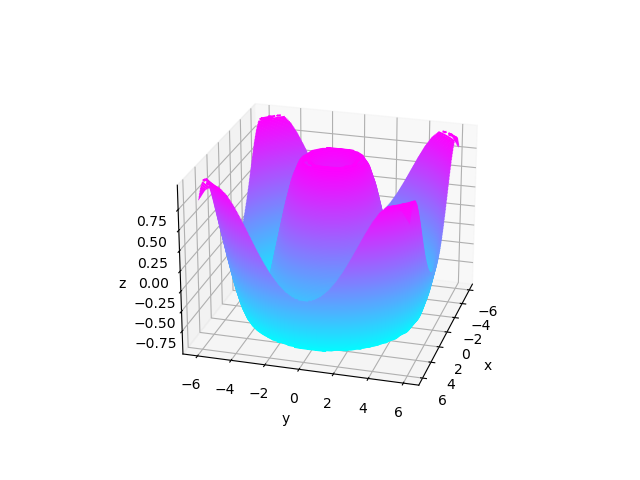

Text(0.5, 0, 'z')

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 190, cmap='cool')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# это же почти потенциал Хиггса 😊

Можно задать угол зрения ``view_init`` для задания угла возвышения и азимутального угла.

<IPython.core.display.Javascript object>


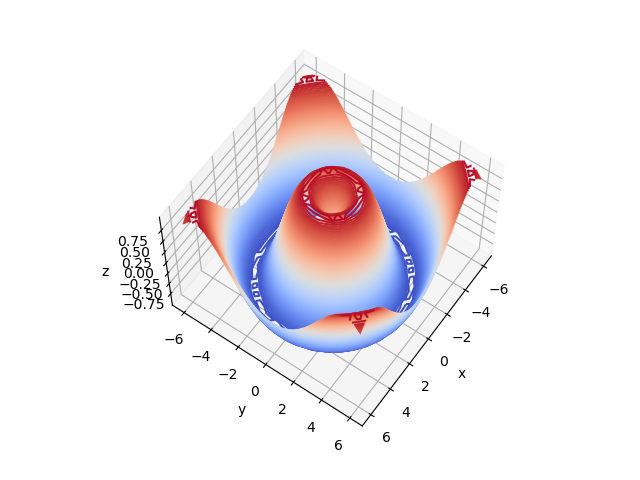

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 125, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)

## Каркасы и поверхностные графики

<IPython.core.display.Javascript object>


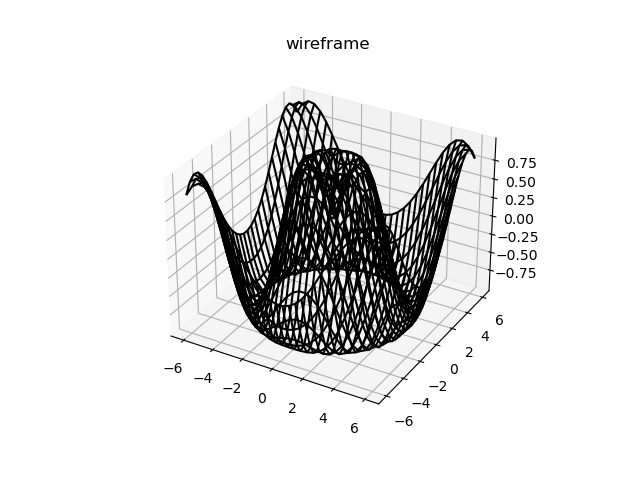

Text(0.5, 0.92, 'wireframe')

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black') # Каркас
ax.set_title('wireframe')

Поверхностный график аналогичен каркасу, но каждая его грань представляет собой заполненный многоугольник:

<IPython.core.display.Javascript object>


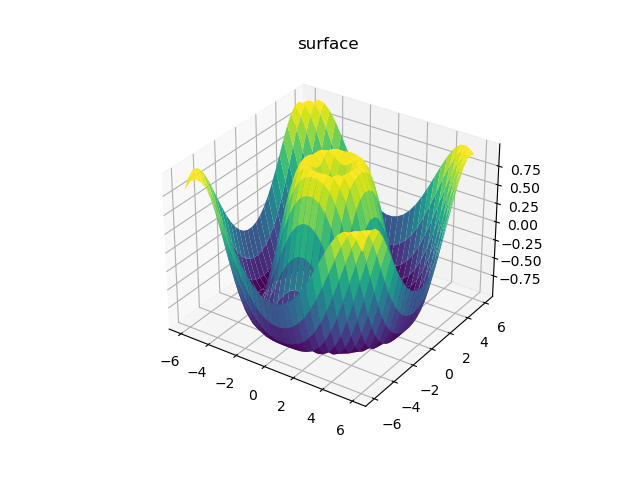

Text(0.5, 0.92, 'surface')

In [28]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# rstride=1, cstride=1 это как бы спрайты
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none') # поверхность
ax.set_title('surface')

###### Срез:

<IPython.core.display.Javascript object>


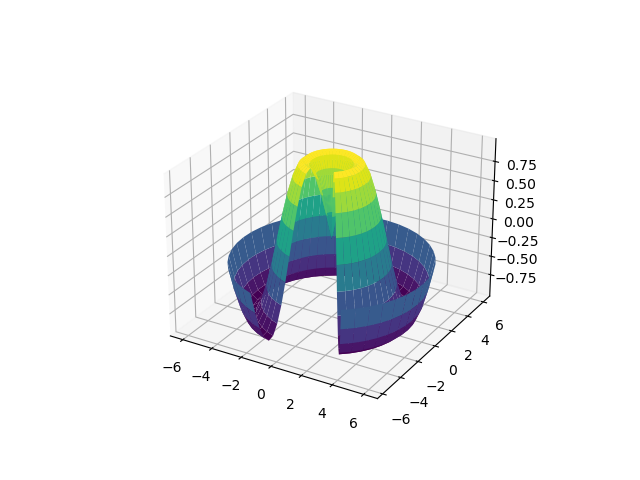

In [44]:
fig = plt.figure()
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

## Триангуляция поверхностей

Бывают случаи, когда удобней графики основанные на координатной сетке из треугольников.
Что если вместо равномерно выбранных значений из декартовой или полярной систем координат, мы имеем дело с набором случайно выбраных значений?

In [55]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

<IPython.core.display.Javascript object>


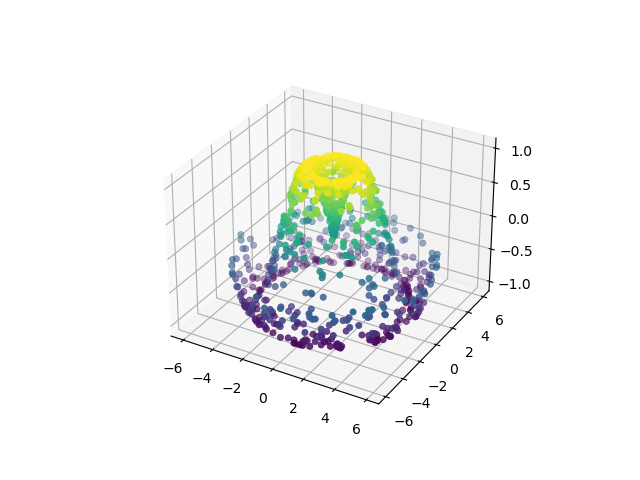

In [56]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)

Поверхность не особо видна, в этом случае поможет ф-ия ``ax.plot_trisurf``

<IPython.core.display.Javascript object>


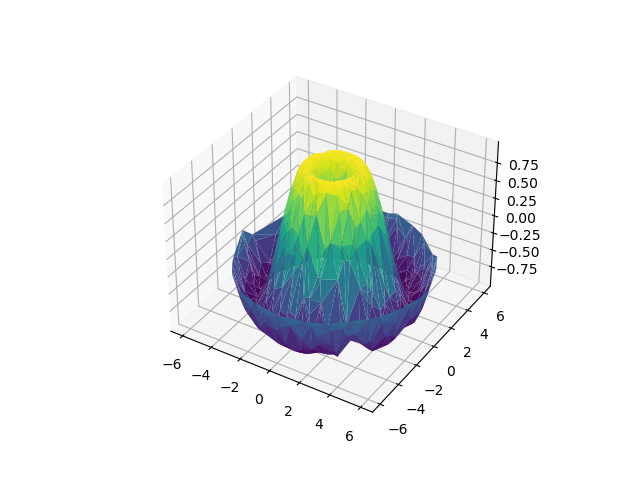

In [57]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')

###### Пример: визуализация ленты Мебиуса
Ключ к ее создания - ее параметризация.

Это двумерная лента, поэтому нам понадобятся 2 координаты. Тета (от 0 до 2pi) и омега ( от -1 до 1) по ширине

In [58]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

Теперь нам надо на основе этой параметризации вычислить координаты (x,y,z).

В данном случае происходит 2 вращательных движения: 
- 1) одно распоожение кольца вокруг центра, на угол тета
- 2) второе - скручивание полоски относительно ее оси координат (фи)

Чтоб получить ленту мебиуса полоска должна выполнять половину скручивания, за один оборот кольца (фи = тета/2)

In [59]:
phi = 0.5 * theta

In [61]:
# радиус в плоскости X-Y

r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

<IPython.core.display.Javascript object>


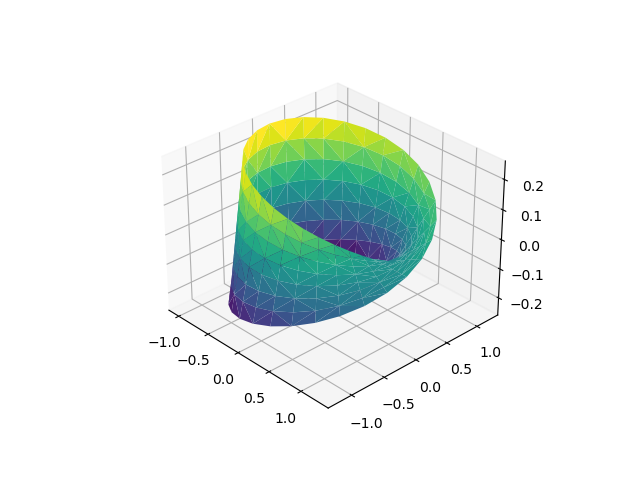

In [62]:
# выполняем триангуляцию в координатах базовой параметризации

from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidth=0.2)


<IPython.core.display.Javascript object>


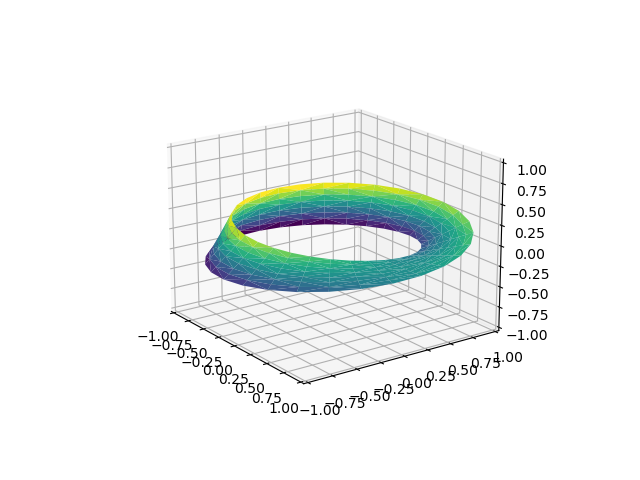

(-1.0, 1.0)

In [63]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidth=0.2)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)